In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Dataset Load**

In [6]:
import pandas as pd

In [7]:
df=pd.read_csv('/content/drive/MyDrive/corona project/bangladesh.csv')

In [8]:
df.head()

,date,new_case,death
0,9-27-2020,1275,32
1,9-28-2020,1407,32
2,9-29-2020,1488,26
3,9-30-2020,1436,32
4,10-1-2020,1508,21


In [9]:
df.tail()

,date,new_case,death
414,11/15/2021,234,4
415,11/16/2021,213,2
416,11/17/2021,266,6
417,11/18/2021,244,5
418,11/19/2021,253,7


In [10]:
df1=df.reset_index()['death']

In [11]:
df1

0      32
1      32
2      26
3      32
4      21
       ..
414     4
415     2
416     6
417     5
418     7
Name: death, Length: 419, dtype: int64

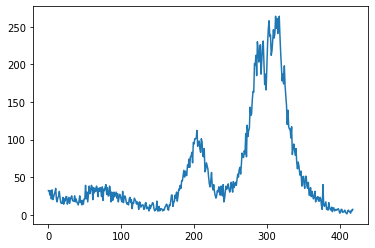

In [12]:
import matplotlib.pyplot as plt
plt.plot(df1)

# **Data Preprocessing**

In [13]:
import numpy as np

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [15]:
print(df1)

[[0.11787072]
 [0.11787072]
 [0.09505703]
 [0.11787072]
 [0.07604563]
 [0.121673  ]
 [0.07224335]
 [0.08365019]
 [0.09885932]
 [0.11026616]
 [0.12927757]
 [0.07224335]
 [0.0608365 ]
 [0.08365019]
 [0.08745247]
 [0.11406844]
 [0.07984791]
 [0.05703422]
 [0.05323194]
 [0.05323194]
 [0.08365019]
 [0.04942966]
 [0.07604563]
 [0.06463878]
 [0.08745247]
 [0.08745247]
 [0.04942966]
 [0.06844106]
 [0.08365019]
 [0.05323194]
 [0.07224335]
 [0.08365019]
 [0.09125475]
 [0.06844106]
 [0.06463878]
 [0.06463878]
 [0.09125475]
 [0.0608365 ]
 [0.07604563]
 [0.0608365 ]
 [0.05323194]
 [0.04562738]
 [0.06463878]
 [0.09125475]
 [0.05703422]
 [0.06844106]
 [0.04562738]
 [0.06844106]
 [0.04942966]
 [0.07604563]
 [0.07604563]
 [0.14448669]
 [0.07604563]
 [0.11026616]
 [0.0608365 ]
 [0.1026616 ]
 [0.14068441]
 [0.1026616 ]
 [0.11787072]
 [0.14448669]
 [0.13688213]
 [0.07224335]
 [0.13307985]
 [0.10646388]
 [0.12927757]
 [0.11406844]
 [0.14068441]
 [0.12927757]
 [0.08745247]
 [0.12927757]
 [0.11406844]
 [0.13

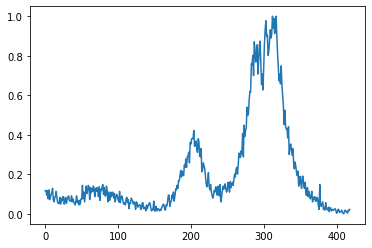

In [16]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [17]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [18]:
training_size,test_size

(272, 147)

In [19]:
train_data

array([[0.11787072],
       [0.11787072],
       [0.09505703],
       [0.11787072],
       [0.07604563],
       [0.121673  ],
       [0.07224335],
       [0.08365019],
       [0.09885932],
       [0.11026616],
       [0.12927757],
       [0.07224335],
       [0.0608365 ],
       [0.08365019],
       [0.08745247],
       [0.11406844],
       [0.07984791],
       [0.05703422],
       [0.05323194],
       [0.05323194],
       [0.08365019],
       [0.04942966],
       [0.07604563],
       [0.06463878],
       [0.08745247],
       [0.08745247],
       [0.04942966],
       [0.06844106],
       [0.08365019],
       [0.05323194],
       [0.07224335],
       [0.08365019],
       [0.09125475],
       [0.06844106],
       [0.06463878],
       [0.06463878],
       [0.09125475],
       [0.0608365 ],
       [0.07604563],
       [0.0608365 ],
       [0.05323194],
       [0.04562738],
       [0.06463878],
       [0.09125475],
       [0.05703422],
       [0.06844106],
       [0.04562738],
       [0.068

In [20]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [21]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [22]:
print(X_train.shape), print(y_train.shape)

(261, 10)
(261,)


(None, None)

In [23]:
print(X_test.shape), print(ytest.shape)

(136, 10)
(136,)


(None, None)

In [24]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# **Stacked LSTM**

In [25]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [26]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 10, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 10, 50)            20200     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
9/9 [==============================] - 13s 171ms/step - loss: 0.0115 - val_loss: 0.0824
Epoch 2/100
9/9 [==============================] - 0s 16ms/step - loss: 0.0063 - val_loss: 0.0972
Epoch 3/100
9/9 [==============================] - 0s 14ms/step - loss: 0.0041 - val_loss: 0.0180
Epoch 4/100
9/9 [==============================] - 0s 14ms/step - loss: 0.0027 - val_loss: 0.0136
Epoch 5/100
9/9 [==============================] - 0s 15ms/step - loss: 0.0022 - val_loss: 0.0139
Epoch 6/100
9/9 [==============================] - 0s 14ms/step - loss: 0.0022 - val_loss: 0.0138
Epoch 7/100
9/9 [==============================] - 0s 21ms/step - loss: 0.0021 - val_loss: 0.0149
Epoch 8/100
9/9 [==============================] - 0s 14ms/step - loss: 0.0023 - val_loss: 0.0168
Epoch 9/100
9/9 [==============================] - 0s 15ms/step - loss: 0.0022 - val_loss: 0.0160
Epoch 10/100
9/9 [==============================] - 0s 14ms/step - loss: 0.0022 - val_loss: 0.0160
Epoch 11/100
9/9 

# **Prediction**

In [29]:
import tensorflow as tf

In [30]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

5/5 [==============================] - 0s 5ms/step


In [31]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

# **Performence Matrix**

## **MSE**

In [32]:
import math
from sklearn.metrics import mean_squared_error


In [33]:
### Train Data MSE
mean_squared_error(y_train,train_predict)

1222.3487367713844

In [34]:
### Test Data RMSE
mean_squared_error(ytest,test_predict)

7129.007257572062

## **RMSE**

In [35]:
### Calculate RMSE performance metrics
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

34.9621042955281

In [36]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

84.43344868932017

## **MAE**

In [37]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_train,train_predict)

29.67928573612622

In [38]:
### Test Data MAE
mean_absolute_error(ytest,test_predict)

63.744886659430705

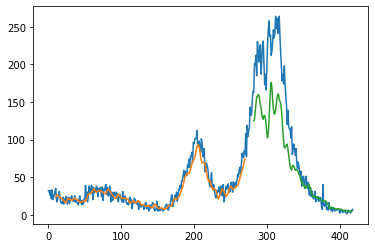

In [39]:
### Plotting 
# shift train predictions for plotting
look_back=10
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [40]:
len(test_data)

147

In [41]:
x_input=test_data[137:].reshape(1,-1)
x_input.shape


(1, 10)

In [42]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [43]:
len(temp_input)

10

In [44]:
temp_input

[0.0038022813688212928,
 0.0,
 0.015209125475285171,
 0.019011406844106463,
 0.011406844106463879,
 0.011406844106463879,
 0.0038022813688212928,
 0.019011406844106463,
 0.015209125475285171,
 0.022813688212927754]

In [45]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=10
i=0
while(i<30):
    
    if(len(temp_input)>10):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)



[0.01829038]
11
1 day input [0.         0.01520913 0.01901141 0.01140684 0.01140684 0.00380228
 0.01901141 0.01520913 0.02281369 0.01829038]
1 day output [[0.01938576]]
2 day input [0.01520913 0.01901141 0.01140684 0.01140684 0.00380228 0.01901141
 0.01520913 0.02281369 0.01829038 0.01938576]
2 day output [[0.02010808]]
3 day input [0.01901141 0.01140684 0.01140684 0.00380228 0.01901141 0.01520913
 0.02281369 0.01829038 0.01938576 0.02010808]
3 day output [[0.02222072]]
4 day input [0.01140684 0.01140684 0.00380228 0.01901141 0.01520913 0.02281369
 0.01829038 0.01938576 0.02010808 0.02222072]
4 day output [[0.02444835]]
5 day input [0.01140684 0.00380228 0.01901141 0.01520913 0.02281369 0.01829038
 0.01938576 0.02010808 0.02222072 0.02444835]
5 day output [[0.02560597]]
6 day input [0.00380228 0.01901141 0.01520913 0.02281369 0.01829038 0.01938576
 0.02010808 0.02222072 0.02444835 0.02560597]
6 day output [[0.02656002]]
7 day input [0.01901141 0.01520913 0.02281369 0.01829038 0.0193857

In [46]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [47]:
import matplotlib.pyplot as plt

In [48]:
len(df1)

419

In [49]:
len(lst_output)

30

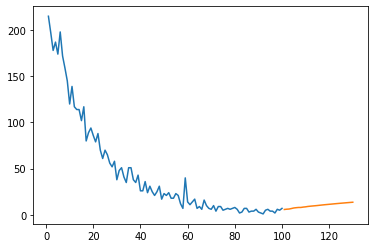

In [50]:
plt.plot(day_new,scaler.inverse_transform(df1[319:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

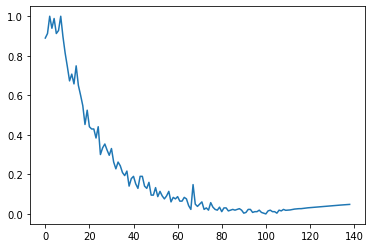

In [51]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[310:])

In [52]:
df3=scaler.inverse_transform(df3).tolist()

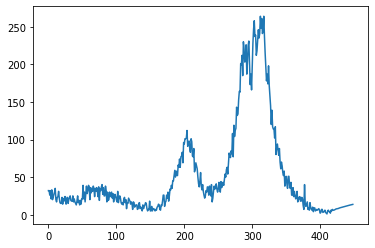

In [53]:
plt.plot(df3)

# **Bidirectional LSTM**

In [54]:
from keras.layers import Bidirectional
model2 = Sequential()
model2.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(10,1)))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error',optimizer='adam')

In [55]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 100)              20800     
 l)                                                              
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 20,901
Trainable params: 20,901
Non-trainable params: 0
_________________________________________________________________


In [56]:
model2.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
9/9 [==============================] - 4s 82ms/step - loss: 0.0197 - val_loss: 0.1799
Epoch 2/100
9/9 [==============================] - 0s 48ms/step - loss: 0.0077 - val_loss: 0.1001
Epoch 3/100
9/9 [==============================] - 0s 40ms/step - loss: 0.0041 - val_loss: 0.0555
Epoch 4/100
9/9 [==============================] - 0s 43ms/step - loss: 0.0036 - val_loss: 0.0412
Epoch 5/100
9/9 [==============================] - 0s 40ms/step - loss: 0.0028 - val_loss: 0.0306
Epoch 6/100
9/9 [==============================] - 0s 41ms/step - loss: 0.0023 - val_loss: 0.0159
Epoch 7/100
9/9 [==============================] - 0s 49ms/step - loss: 0.0018 - val_loss: 0.0090
Epoch 8/100
9/9 [==============================] - 0s 42ms/step - loss: 0.0014 - val_loss: 0.0102
Epoch 9/100
9/9 [==============================] - 0s 45ms/step - loss: 0.0014 - val_loss: 0.0119
Epoch 10/100
9/9 [==============================] - 0s 41ms/step - loss: 0.0014 - val_loss: 0.0113
Epoch 11/100
9/9 [=

In [57]:
train_predict=model2.predict(X_train)
test_predict=model2.predict(X_test)

5/5 [==============================] - 0s 5ms/step


In [58]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

# **Performence Matrix**

## **MSE**

In [59]:
mean_squared_error(y_train,train_predict)

1393.4950737208558

In [60]:
### Test Data RMSE
mean_squared_error(ytest,test_predict)

5163.782393196198

## **RMSE**

In [61]:
### Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_train,train_predict))

37.32954692627351

In [62]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

71.85946279507104

## **MAE**

In [63]:
mean_absolute_error(y_train,train_predict)

30.323701766922316

In [64]:
### Test Data MAE
mean_absolute_error(ytest,test_predict)

52.484726477101916

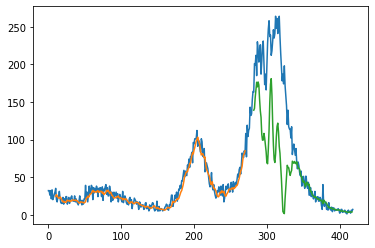

In [65]:
### Plotting 
# shift train predictions for plotting
look_back=10
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [66]:
x_input=test_data[137:].reshape(1,-1)
x_input.shape

(1, 10)

In [67]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [68]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=10
i=0
while(i<30):
    
    if(len(temp_input)>10):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model2.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model2.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.01319696]
11
1 day input [0.         0.01520913 0.01901141 0.01140684 0.01140684 0.00380228
 0.01901141 0.01520913 0.02281369 0.01319696]
1 day output [[0.0132685]]
2 day input [0.01520913 0.01901141 0.01140684 0.01140684 0.00380228 0.01901141
 0.01520913 0.02281369 0.01319696 0.0132685 ]
2 day output [[0.0132224]]
3 day input [0.01901141 0.01140684 0.01140684 0.00380228 0.01901141 0.01520913
 0.02281369 0.01319696 0.0132685  0.0132224 ]
3 day output [[0.01296585]]
4 day input [0.01140684 0.01140684 0.00380228 0.01901141 0.01520913 0.02281369
 0.01319696 0.0132685  0.0132224  0.01296585]
4 day output [[0.0125854]]
5 day input [0.01140684 0.00380228 0.01901141 0.01520913 0.02281369 0.01319696
 0.0132685  0.0132224  0.01296585 0.0125854 ]
5 day output [[0.01223392]]
6 day input [0.00380228 0.01901141 0.01520913 0.02281369 0.01319696 0.0132685
 0.0132224  0.01296585 0.0125854  0.01223392]
6 day output [[0.01179758]]
7 day input [0.01901141 0.01520913 0.02281369 0.01319696 0.0132685  0.

In [69]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

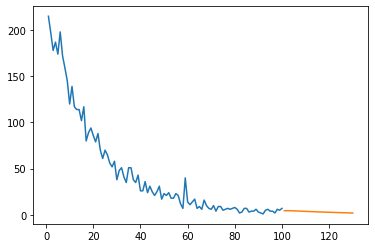

In [70]:
plt.plot(day_new,scaler.inverse_transform(df1[319:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

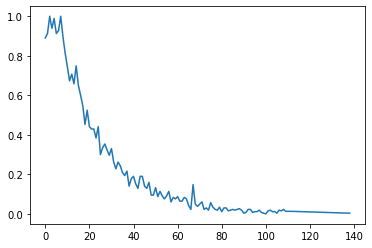

In [71]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[310:])

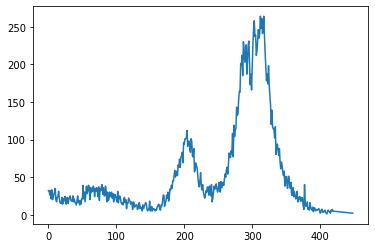

In [72]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)

# **Vanilla LSTM**

In [73]:
model3 = Sequential()
model3.add(LSTM(50, activation='relu', input_shape=(10, 1)))
model3.add(Dense(1))
model3.compile(loss='mean_squared_error',optimizer='adam')

In [74]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 50)                10400     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [75]:
model3.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
9/9 [==============================] - 2s 52ms/step - loss: 0.0146 - val_loss: 0.1393
Epoch 2/100
9/9 [==============================] - 0s 22ms/step - loss: 0.0062 - val_loss: 0.0789
Epoch 3/100
9/9 [==============================] - 0s 25ms/step - loss: 0.0040 - val_loss: 0.0435
Epoch 4/100
9/9 [==============================] - 0s 23ms/step - loss: 0.0033 - val_loss: 0.0360
Epoch 5/100
9/9 [==============================] - 0s 26ms/step - loss: 0.0026 - val_loss: 0.0249
Epoch 6/100
9/9 [==============================] - 0s 23ms/step - loss: 0.0020 - val_loss: 0.0106
Epoch 7/100
9/9 [==============================] - 0s 22ms/step - loss: 0.0016 - val_loss: 0.0079
Epoch 8/100
9/9 [==============================] - 0s 24ms/step - loss: 0.0013 - val_loss: 0.0133
Epoch 9/100
9/9 [==============================] - 0s 25ms/step - loss: 0.0012 - val_loss: 0.0135
Epoch 10/100
9/9 [==============================] - 0s 26ms/step - loss: 0.0012 - val_loss: 0.0138
Epoch 11/100
9/9 [=

# **Prediction**

In [76]:
train_predict=model3.predict(X_train)
test_predict=model3.predict(X_test)
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

5/5 [==============================] - 0s 4ms/step


# **Performence Matrix**

## **MSE**

In [77]:
mean_squared_error(y_train,train_predict)

1694.8434463772915

In [78]:
### Test Data RMSE
mean_squared_error(ytest,test_predict)

6524.380949271206

## **RMSE**

In [79]:
### Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_train,train_predict))

41.16847636696422

In [80]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

80.77364018831395

## **MAE**

In [81]:
mean_absolute_error(y_train,train_predict)

34.31224459955632

In [82]:
### Test Data MAE
mean_absolute_error(ytest,test_predict)

58.4665023657439

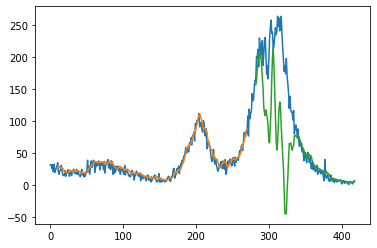

In [83]:
### Plotting 
# shift train predictions for plotting
look_back=10
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [84]:
x_input=test_data[137:].reshape(1,-1)
x_input.shape

(1, 10)

In [85]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [86]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=10
i=0
while(i<30):
    
    if(len(temp_input)>10):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model3.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model3.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.0183197]
11
1 day input [0.         0.01520913 0.01901141 0.01140684 0.01140684 0.00380228
 0.01901141 0.01520913 0.02281369 0.0183197 ]
1 day output [[0.01945245]]
2 day input [0.01520913 0.01901141 0.01140684 0.01140684 0.00380228 0.01901141
 0.01520913 0.02281369 0.0183197  0.01945245]
2 day output [[0.02045937]]
3 day input [0.01901141 0.01140684 0.01140684 0.00380228 0.01901141 0.01520913
 0.02281369 0.0183197  0.01945245 0.02045937]
3 day output [[0.02176512]]
4 day input [0.01140684 0.01140684 0.00380228 0.01901141 0.01520913 0.02281369
 0.0183197  0.01945245 0.02045937 0.02176512]
4 day output [[0.02339308]]
5 day input [0.01140684 0.00380228 0.01901141 0.01520913 0.02281369 0.0183197
 0.01945245 0.02045937 0.02176512 0.02339308]
5 day output [[0.02477448]]
6 day input [0.00380228 0.01901141 0.01520913 0.02281369 0.0183197  0.01945245
 0.02045937 0.02176512 0.02339308 0.02477448]
6 day output [[0.02616049]]
7 day input [0.01901141 0.01520913 0.02281369 0.0183197  0.01945245 

In [87]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)   

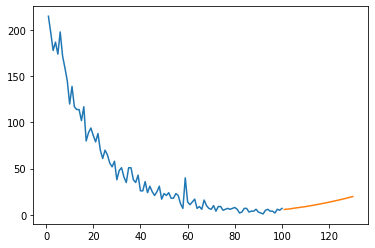

In [88]:
plt.plot(day_new,scaler.inverse_transform(df1[319:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

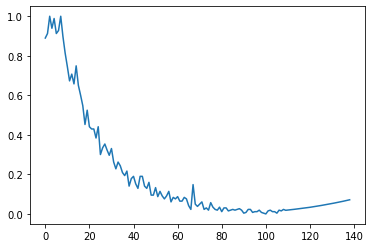

In [89]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[310:])

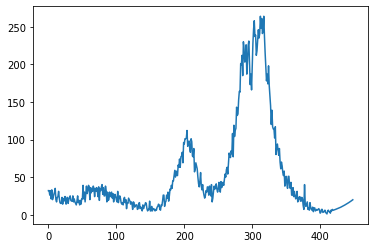

In [90]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)

# **ConvLSTM1D**

In [91]:
X_train = X_train.reshape((261, 1, 10, 1))
X_test = X_test.reshape((136, 1, 10, 1))

In [92]:
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
model4 = Sequential()
model4.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None,10,1)))
model4.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model4.add(TimeDistributed(Flatten()))
model4.add(LSTM(50, activation='relu'))
model4.add(Dense(1))
model4.compile(loss='mean_squared_error',optimizer='adam')

In [93]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, None, 10, 64)     128       
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, None, 5, 64)      0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, None, 320)        0         
 tributed)                                                       
                                                                 
 lstm_6 (LSTM)               (None, 50)                74200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                      

In [94]:
model4.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
9/9 [==============================] - 7s 52ms/step - loss: 0.0185 - val_loss: 0.1591
Epoch 2/100
9/9 [==============================] - 0s 11ms/step - loss: 0.0088 - val_loss: 0.0651
Epoch 3/100
9/9 [==============================] - 0s 14ms/step - loss: 0.0034 - val_loss: 0.0136
Epoch 4/100
9/9 [==============================] - 0s 12ms/step - loss: 0.0034 - val_loss: 0.0125
Epoch 5/100
9/9 [==============================] - 0s 11ms/step - loss: 0.0024 - val_loss: 0.0113
Epoch 6/100
9/9 [==============================] - 0s 11ms/step - loss: 0.0021 - val_loss: 0.0127
Epoch 7/100
9/9 [==============================] - 0s 10ms/step - loss: 0.0018 - val_loss: 0.0231
Epoch 8/100
9/9 [==============================] - 0s 11ms/step - loss: 0.0016 - val_loss: 0.0274
Epoch 9/100
9/9 [==============================] - 0s 12ms/step - loss: 0.0016 - val_loss: 0.0390
Epoch 10/100
9/9 [==============================] - 0s 10ms/step - loss: 0.0016 - val_loss: 0.0364
Epoch 11/100
9/9 [=

# **Predection**

In [95]:
train_predict=model4.predict(X_train)
test_predict=model4.predict(X_test)
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

5/5 [==============================] - 0s 3ms/step


# **Performence Matrix**

## **MSE**

In [96]:
mean_squared_error(y_train,train_predict)

1543.1955416806404

In [97]:
### Test Data RMSE
mean_squared_error(ytest,test_predict)

11335.641065641319

## **RMSE**

In [98]:
### Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_train,train_predict))

39.28352761248206

In [99]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

106.46896761799336

## **MAE**

In [100]:
mean_absolute_error(y_train,train_predict)

32.580233529816404

In [101]:
### Test Data MAE
mean_absolute_error(ytest,test_predict)

78.22883270408613

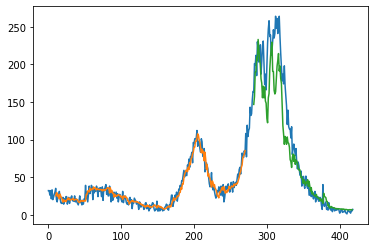

In [102]:
### Plotting 
# shift train predictions for plotting
look_back=10
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [103]:
x_input=test_data[137:].reshape(1,-1)
x_input.shape

(1, 10)

In [104]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [105]:
temp_input

[0.0038022813688212928,
 0.0,
 0.015209125475285171,
 0.019011406844106463,
 0.011406844106463879,
 0.011406844106463879,
 0.0038022813688212928,
 0.019011406844106463,
 0.015209125475285171,
 0.022813688212927754]

In [106]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=10
i=0
while(i<30):
    
    if(len(temp_input)>10):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1,1, n_steps, 1))
        #print(x_input)
        yhat = model4.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1,1, n_steps,1))
        yhat = model4.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.02366554]
11
1 day input [0.         0.01520913 0.01901141 0.01140684 0.01140684 0.00380228
 0.01901141 0.01520913 0.02281369 0.02366554]
1 day output [[0.02353388]]
2 day input [0.01520913 0.01901141 0.01140684 0.01140684 0.00380228 0.01901141
 0.01520913 0.02281369 0.02366554 0.02353388]
2 day output [[0.0247489]]
3 day input [0.01901141 0.01140684 0.01140684 0.00380228 0.01901141 0.01520913
 0.02281369 0.02366554 0.02353388 0.0247489 ]
3 day output [[0.02511158]]
4 day input [0.01140684 0.01140684 0.00380228 0.01901141 0.01520913 0.02281369
 0.02366554 0.02353388 0.0247489  0.02511158]
4 day output [[0.02605144]]
5 day input [0.01140684 0.00380228 0.01901141 0.01520913 0.02281369 0.02366554
 0.02353388 0.0247489  0.02511158 0.02605144]
5 day output [[0.02652996]]
6 day input [0.00380228 0.01901141 0.01520913 0.02281369 0.02366554 0.02353388
 0.0247489  0.02511158 0.02605144 0.02652996]
6 day output [[0.0265731]]
7 day input [0.01901141 0.01520913 0.02281369 0.02366554 0.02353388 

In [107]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)   

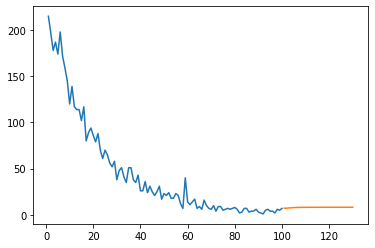

In [108]:
plt.plot(day_new,scaler.inverse_transform(df1[319:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

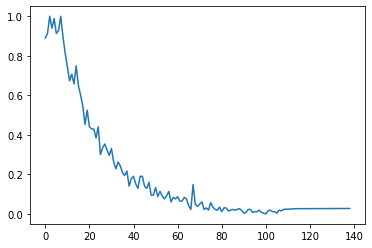

In [109]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[310:])

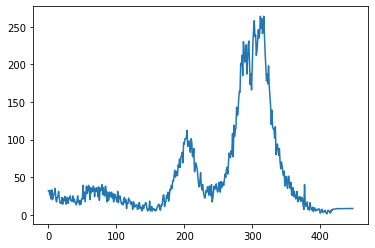

In [110]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)